### Boston 주택 가격 예측(Linear Regression, scikit-learn 사용) :선형회귀모델

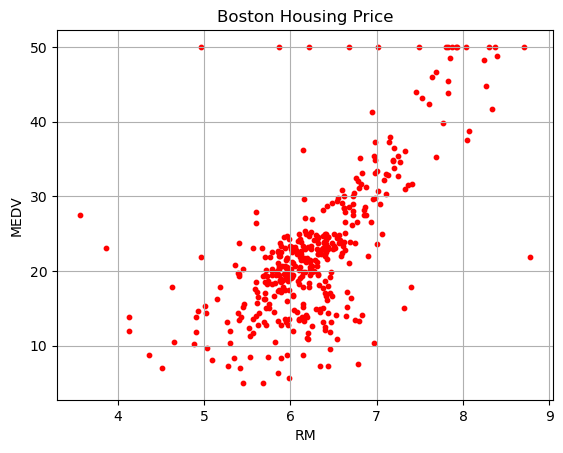

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,2.30040,0.0,19.58,0.605,6.319,96.1,2.1000,403,14.7,23.8
1,13.35980,0.0,18.10,0.693,5.887,94.7,1.7821,666,20.2,12.7
2,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,233,17.9,26.6
3,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,305,19.2,21.7
4,0.03768,80.0,1.52,0.404,7.274,38.3,7.3090,329,12.6,34.6
...,...,...,...,...,...,...,...,...,...,...
395,0.23912,0.0,9.69,0.585,6.019,65.3,2.4091,391,19.2,21.2
396,0.04560,0.0,13.89,0.550,5.888,56.0,3.1121,276,16.4,23.3
397,1.38799,0.0,8.14,0.538,5.950,82.0,3.9900,307,21.0,13.2
398,7.36711,0.0,18.10,0.679,6.193,78.1,1.9356,666,20.2,11.0


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# EDA : 탐색적 데이터 분석
df = pd.read_csv('boston_train.csv')

# 상관계수
df.corr()
# 'RM' : 방의 갯수 , 0.685041

# 시각화
plt.scatter(df['RM'],df['MEDV'],c='r',s=10)
plt.xlabel('RM')    # x축: RM(방의 갯수)
plt.ylabel('MEDV')  # y축: MEDV(주택가격)
plt.title('Boston Housing Price')
plt.grid()
plt.show()
df

(400, 1) (400, 1)
[[9.02315014]]
[-33.99803804]


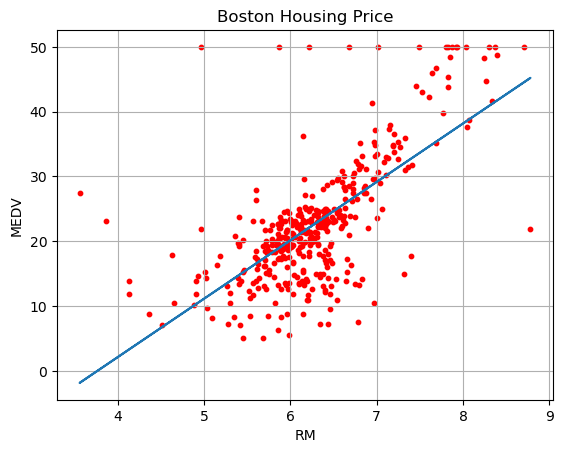

In [26]:
# 단항(1차원, 피처가 1개) 회귀 모델, scikit-learn 사용
from sklearn.linear_model import LinearRegression

# 클래스의 인스턴스를 생성
lr = LinearRegression()

# 입출력 데이터를 설정 : 2차원 배열
x = df['RM'].values.reshape(-1,1)   # (400,) --> (400,1),2차원, -1은 자동 계산
y = df['MEDV'].values.reshape(-1,1) # (400,) --> (400,1),2차원, -1은 자동 계산
print(x.shape,y.shape)

# 학습
lr.fit(x,y)

# 회귀계수를 출력
print(lr.coef_)         # weight : [[9.02315014]]
print(lr.intercept_)    # bias : [-33.99803804]
                        # H(X) = 9.02315014*X - 33.99803804
    
# 예측
y_pred = lr.predict(x)

# 결과 시각화
plt.scatter(x,y,c='r',s=10)
plt.xlabel('RM')    # x축: RM(방의 갯수)
plt.ylabel('MEDV')  # y축: MEDV(주택가격)
plt.title('Boston Housing Price')
plt.grid()

# 예측 함수(직선그래프) : H(x) = 9.02315014*x - 33.99803804
plt.plot(x,y_pred)
plt.show()

In [29]:
# 정확도 측정, 평가 지표
# RMSE , 상대 지표(값이 작을 수록 정확도가 높다)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y,y_pred)  # 평균 제곱 오차
rmse = np.sqrt(mse)                 # 평균 제곱근 오차
print('RMSE:',rmse)                 # RMSE: 6.964958263761021

# R2(R-squared),결정 계수 : 예측 값의 분산/실제 값의 분산 , 1일때 가장 설명력이 높다
#                          절대 지표
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
print('r2_score:',r2)      # 0.46928062004385107

RMSE: 6.964958263761021
r2_score: 0.46928062004385107
